# Time Series Prediction and Forecasting Using RNN

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler

from statsmodels.tsa.seasonal import seasonal_decompose

from keras.preprocessing.sequence import TimeseriesGenerator

from keras.models import Sequential
from keras.layers import Dense, LSTM

In [13]:
df= pd.read_csv("Miles_Traveled.csv", index_col= 0, parse_dates= True)

In [14]:
df.head()

,TRFVOLUSM227NFWA
DATE,
1970-01-01,80173.0
1970-02-01,77442.0
1970-03-01,90223.0
1970-04-01,89956.0
1970-05-01,97972.0


In [15]:
df.columns= ["Miles"]

In [16]:
df.head()

,Miles
DATE,
1970-01-01,80173.0
1970-02-01,77442.0
1970-03-01,90223.0
1970-04-01,89956.0
1970-05-01,97972.0


In [17]:
df.shape

(588, 1)

In [18]:
df.index

DatetimeIndex(['1970-01-01', '1970-02-01', '1970-03-01', '1970-04-01',
               '1970-05-01', '1970-06-01', '1970-07-01', '1970-08-01',
               '1970-09-01', '1970-10-01',
               ...
               '2018-03-01', '2018-04-01', '2018-05-01', '2018-06-01',
               '2018-07-01', '2018-08-01', '2018-09-01', '2018-10-01',
               '2018-11-01', '2018-12-01'],
              dtype='datetime64[ns]', name='DATE', length=588, freq=None)

In [19]:
df.index.freq = "MS"

In [20]:
df.index

DatetimeIndex(['1970-01-01', '1970-02-01', '1970-03-01', '1970-04-01',
               '1970-05-01', '1970-06-01', '1970-07-01', '1970-08-01',
               '1970-09-01', '1970-10-01',
               ...
               '2018-03-01', '2018-04-01', '2018-05-01', '2018-06-01',
               '2018-07-01', '2018-08-01', '2018-09-01', '2018-10-01',
               '2018-11-01', '2018-12-01'],
              dtype='datetime64[ns]', name='DATE', length=588, freq='MS')

<AxesSubplot:xlabel='DATE'>

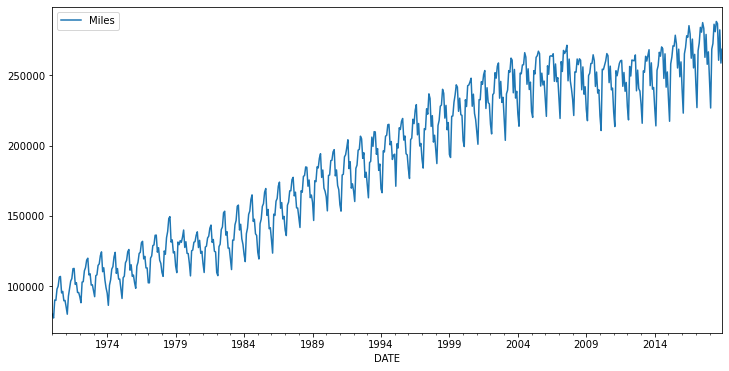

In [21]:
df.plot(figsize= (12,6))

### ETS Decomposition:

In [23]:
decomp = seasonal_decompose(df["Miles"], model= "additive")

<AxesSubplot:xlabel='DATE'>

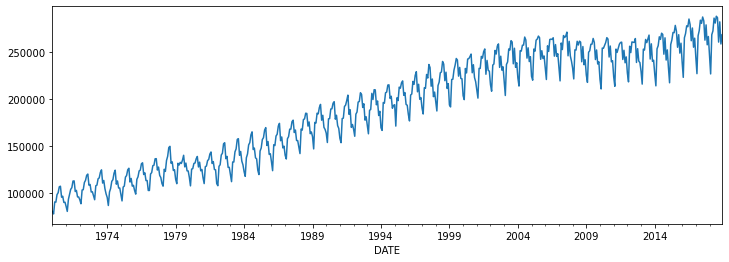

In [24]:
decomp.observed.plot(figsize= (12,4))

<AxesSubplot:xlabel='DATE'>

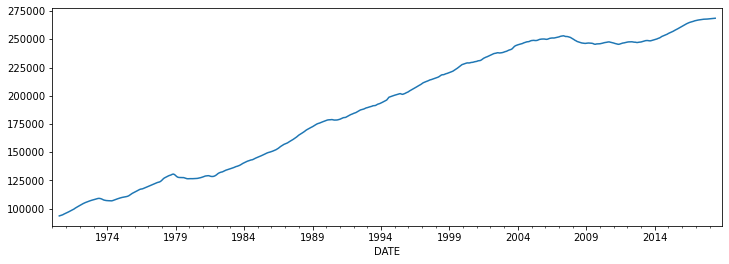

In [25]:
decomp.trend.plot(figsize= (12,4))

<AxesSubplot:xlabel='DATE'>

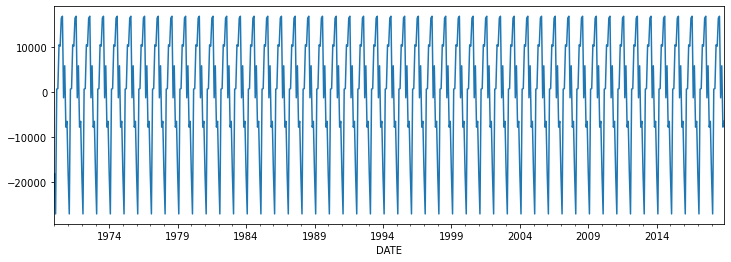

In [26]:
decomp.seasonal.plot(figsize= (12,4))

<AxesSubplot:xlabel='DATE'>

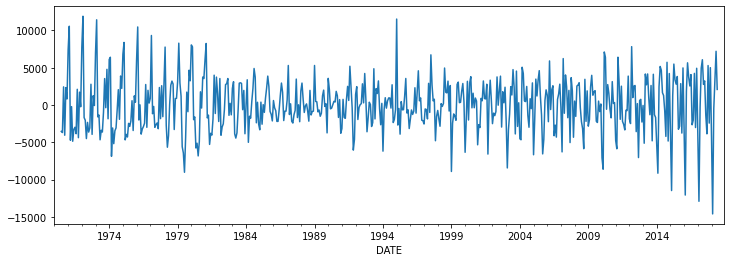

In [27]:
decomp.resid.plot(figsize= (12,4))

### Train Test Split:

In [28]:
len(df)

588

In [29]:
train_data = df[:554]
test_data = df[554:]

In [30]:
train_data.shape

(554, 1)

In [31]:
test_data.shape

(34, 1)

### Scalling:

In [32]:
scalar = MinMaxScaler()

In [33]:
scalar.fit(train_data)

MinMaxScaler()

In [34]:
scaled_train = scalar.transform(train_data)

In [35]:
scaled_test = scalar.transform(test_data)

In [36]:
scaled_train[:5]

array([[0.0135918 ],
       [0.        ],
       [0.06360922],
       [0.0622804 ],
       [0.10217489]])

In [37]:
scaled_test[:5]

array([[0.93418106],
       [0.95660678],
       [0.99800926],
       [0.99312696],
       [1.03378291]])

### Time Series Generator:

In [38]:
n_inputs= 24
n_features= 1

In [40]:
time_gen = TimeseriesGenerator(data= scaled_train, targets= scaled_train, length= n_inputs, batch_size= 1)

In [41]:
time_gen[0]

(array([[[0.0135918 ],
         [0.        ],
         [0.06360922],
         [0.0622804 ],
         [0.10217489],
         [0.11244214],
         [0.14408003],
         [0.14695167],
         [0.08864779],
         [0.09393819],
         [0.06092669],
         [0.06205644],
         [0.03928731],
         [0.01331807],
         [0.07730055],
         [0.10284179],
         [0.13045837],
         [0.13930722],
         [0.17430946],
         [0.17518539],
         [0.1186881 ],
         [0.12483452],
         [0.09014582],
         [0.08994675]]]),
 array([[0.07476733]]))

In [42]:
x,y = time_gen[0]

In [43]:
x

array([[[0.0135918 ],
        [0.        ],
        [0.06360922],
        [0.0622804 ],
        [0.10217489],
        [0.11244214],
        [0.14408003],
        [0.14695167],
        [0.08864779],
        [0.09393819],
        [0.06092669],
        [0.06205644],
        [0.03928731],
        [0.01331807],
        [0.07730055],
        [0.10284179],
        [0.13045837],
        [0.13930722],
        [0.17430946],
        [0.17518539],
        [0.1186881 ],
        [0.12483452],
        [0.09014582],
        [0.08994675]]])

In [44]:
y

array([[0.07476733]])

In [45]:
x.shape

(1, 24, 1)

### Recurrent Neural Network:

In [47]:
model = Sequential()

model.add(LSTM(200, activation= "relu", input_shape= (n_inputs, n_features)))

model.add(Dense(1))

model.compile(loss= "mse", optimizer= "adam")

In [48]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 200)               161600    
                                                                 
 dense_1 (Dense)             (None, 1)                 201       
                                                                 
Total params: 161,801
Trainable params: 161,801
Non-trainable params: 0
_________________________________________________________________


In [51]:
model.fit(time_gen, epochs= 50)

Epoch 1/50
530/530 [==============================] - 7s 11ms/step - loss: 0.0163
Epoch 2/50
530/530 [==============================] - 6s 11ms/step - loss: 0.0070
Epoch 3/50
530/530 [==============================] - 6s 11ms/step - loss: 0.0068
Epoch 4/50
530/530 [==============================] - 6s 11ms/step - loss: 0.0060
Epoch 5/50
530/530 [==============================] - 6s 11ms/step - loss: 0.0060
Epoch 6/50
530/530 [==============================] - 6s 11ms/step - loss: 0.0048
Epoch 7/50
530/530 [==============================] - 6s 11ms/step - loss: 0.0031
Epoch 8/50
530/530 [==============================] - 6s 11ms/step - loss: 0.0027
Epoch 9/50
530/530 [==============================] - 6s 11ms/step - loss: 0.0019
Epoch 10/50
530/530 [==============================] - 6s 11ms/step - loss: 0.0020
Epoch 11/50
530/530 [==============================] - 6s 11ms/step - loss: 0.0016
Epoch 12/50
530/530 [==============================] - 6s 12ms/step - loss: 0.0014
Epoch 13/50
5

In [52]:
model.history.history["loss"]

[0.016326922923326492,
 0.006953861564397812,
 0.006799866445362568,
 0.00604759156703949,
 0.005995871964842081,
 0.004848018754273653,
 0.0030589071102440357,
 0.002748466096818447,
 0.0018721790984272957,
 0.0020108933094888926,
 0.0015885216416791081,
 0.0014260848984122276,
 0.0014438815414905548,
 0.0012940578162670135,
 0.0012237883638590574,
 0.001191534218378365,
 0.0011586265172809362,
 0.0012188495602458715,
 0.0010322295129299164,
 0.0010122068924829364,
 0.0010077212937176228,
 0.0008968203328549862,
 0.0009193951264023781,
 0.0008618568535894156,
 0.0008930292096920311,
 0.0008178003481589258,
 0.0008683669730089605,
 0.0007784498739056289,
 0.0008619121508672833,
 0.000760498340241611,
 0.0007369433878920972,
 0.0007554286858066916,
 0.0007323281606659293,
 0.0008069672621786594,
 0.0006947132060304284,
 0.0007508571143262088,
 0.0007037495961412787,
 0.0007551982998847961,
 0.0006612025899812579,
 0.0006404353189282119,
 0.0007427405216731131,
 0.0006475289701484144,
 0

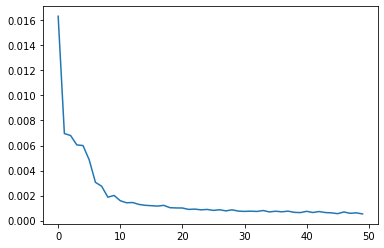

In [54]:
plt.plot(range(len(model.history.history["loss"])), model.history.history["loss"])

### Predictions on Test Data:

In [55]:
first_batch = scaled_train[-n_inputs:]

In [56]:
first_batch

array([[0.87583736],
       [0.89232071],
       [0.93960583],
       [0.92578012],
       [0.95859752],
       [0.9525158 ],
       [0.8472901 ],
       [0.93416613],
       [0.81624944],
       [0.87009904],
       [0.77666849],
       [0.6956552 ],
       [0.89869606],
       [0.92258498],
       [0.96250933],
       [0.96119046],
       [1.        ],
       [0.96932763],
       [0.8841288 ],
       [0.95071418],
       [0.85303837],
       [0.9056985 ],
       [0.80743045],
       [0.72447619]])

In [57]:
# Reshaping Batch in Tim Generator Batch Shape (x.shape in line 45):

first_batch= first_batch.reshape((1, n_inputs, n_features))

In [58]:
first_batch

array([[[0.87583736],
        [0.89232071],
        [0.93960583],
        [0.92578012],
        [0.95859752],
        [0.9525158 ],
        [0.8472901 ],
        [0.93416613],
        [0.81624944],
        [0.87009904],
        [0.77666849],
        [0.6956552 ],
        [0.89869606],
        [0.92258498],
        [0.96250933],
        [0.96119046],
        [1.        ],
        [0.96932763],
        [0.8841288 ],
        [0.95071418],
        [0.85303837],
        [0.9056985 ],
        [0.80743045],
        [0.72447619]]])

In [59]:
model.predict(first_batch)

array([[0.9100647]], dtype=float32)

In [60]:
model.predict(first_batch)[0]

array([0.9100647], dtype=float32)

### Loop To Perform Number of Predictions as Length of Test Data:

In [61]:
test_preds = []

batch = scaled_train[-n_inputs:]
batch = batch.reshape((1, n_inputs, n_features))

for i in range(len(test_data)):
    
    current_pred = model.predict(batch)[0]
    
    test_preds.append(current_pred)
    
    batch = np.append(batch[:, 1:, :],[[current_pred]], axis= 1)

In [62]:
test_preds

[array([0.9100647], dtype=float32),
 array([0.91498625], dtype=float32),
 array([0.97151375], dtype=float32),
 array([0.96569204], dtype=float32),
 array([0.9940779], dtype=float32),
 array([0.97636914], dtype=float32),
 array([0.89668393], dtype=float32),
 array([0.9456612], dtype=float32),
 array([0.8491883], dtype=float32),
 array([0.8708074], dtype=float32),
 array([0.77940357], dtype=float32),
 array([0.7174951], dtype=float32),
 array([0.91994464], dtype=float32),
 array([0.92987883], dtype=float32),
 array([0.9872674], dtype=float32),
 array([0.9888319], dtype=float32),
 array([1.0233709], dtype=float32),
 array([0.9920496], dtype=float32),
 array([0.924698], dtype=float32),
 array([0.9580643], dtype=float32),
 array([0.87755764], dtype=float32),
 array([0.89424646], dtype=float32),
 array([0.8000318], dtype=float32),
 array([0.7416662], dtype=float32),
 array([0.9310049], dtype=float32),
 array([0.9350809], dtype=float32),
 array([0.99720144], dtype=float32),
 array([0.99493754

### Inverse Scalling:

In [63]:
unscaled_pred = scalar.inverse_transform(test_preds)

In [64]:
unscaled_pred

array([[260301.29962158],
       [261290.18777204],
       [272648.25741959],
       [271478.50226116],
       [277182.07664919],
       [273623.85180902],
       [257612.7023263 ],
       [267453.70233846],
       [248069.41070271],
       [252413.33274794],
       [234047.55878043],
       [221608.28718972],
       [262286.47731376],
       [264282.55349469],
       [275813.63365722],
       [276127.98918796],
       [283067.90730309],
       [276774.52107501],
       [263241.56817269],
       [269945.86335611],
       [253769.6556623 ],
       [257122.94100833],
       [238192.38579583],
       [226464.98911929],
       [264508.81091189],
       [265327.8024013 ],
       [277809.68588543],
       [277354.79973149],
       [283050.44576836],
       [277909.49688029],
       [265148.10907674],
       [269486.28246856],
       [253624.38240004],
       [253459.30023623]])

In [65]:
test_data

,Miles
DATE,
2016-03-01,265147.0
2016-04-01,269653.0
2016-05-01,277972.0
2016-06-01,276991.0
2016-07-01,285160.0
2016-08-01,279213.0
2016-09-01,262039.0
2016-10-01,275610.0
2016-11-01,255154.0


In [66]:
test_data["Predictions"] = unscaled_pred

C:\Users\Shailya\AppData\Local\Temp/ipykernel_11916/2165736587.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data["Predictions"] = unscaled_pred


In [67]:
test_data.head()

,Miles,Predictions
DATE,,
2016-03-01,265147.0,260301.299622
2016-04-01,269653.0,261290.187772
2016-05-01,277972.0,272648.257420
2016-06-01,276991.0,271478.502261
2016-07-01,285160.0,277182.076649


<AxesSubplot:xlabel='DATE'>

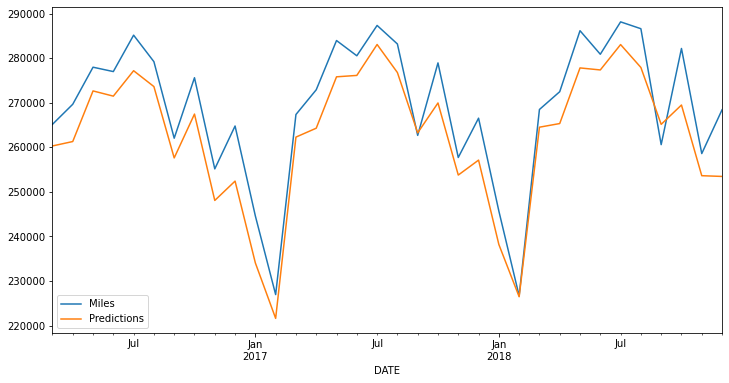

In [68]:
test_data.plot(figsize= (12,6))

### Training Model on Whole Data and Forecast into Future:

In [69]:
df.head()

,Miles
DATE,
1970-01-01,80173.0
1970-02-01,77442.0
1970-03-01,90223.0
1970-04-01,89956.0
1970-05-01,97972.0


In [70]:
scalar = MinMaxScaler()

In [71]:
scaled_df = scalar.fit_transform(df)

In [73]:
scaled_df[:5]

array([[0.01296137],
       [0.        ],
       [0.06065884],
       [0.05939166],
       [0.09743573]])

In [74]:
n_inputs = 24
n_features = 1

In [75]:
final_time_gen = TimeseriesGenerator(data= scaled_df, targets= scaled_df, length= n_inputs, batch_size= 1)

In [76]:
final_time_gen[0]

(array([[[0.01296137],
         [0.        ],
         [0.06065884],
         [0.05939166],
         [0.09743573],
         [0.10722676],
         [0.13739719],
         [0.14013564],
         [0.08453605],
         [0.08958107],
         [0.05810074],
         [0.05917808],
         [0.03746506],
         [0.01270034],
         [0.07371513],
         [0.09807169],
         [0.12440734],
         [0.13284576],
         [0.1662245 ],
         [0.1670598 ],
         [0.11318301],
         [0.11904434],
         [0.0859646 ],
         [0.08577476]]]),
 array([[0.07129941]]))

In [77]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 200)               161600    
                                                                 
 dense_1 (Dense)             (None, 1)                 201       
                                                                 
Total params: 161,801
Trainable params: 161,801
Non-trainable params: 0
_________________________________________________________________


In [78]:
model.fit(final_time_gen, epochs= 50)

Epoch 1/50
564/564 [==============================] - 6s 11ms/step - loss: 5.8579e-04
Epoch 2/50
564/564 [==============================] - 6s 11ms/step - loss: 5.7206e-04
Epoch 3/50
564/564 [==============================] - 6s 11ms/step - loss: 5.2190e-04
Epoch 4/50
564/564 [==============================] - 6s 11ms/step - loss: 5.6701e-04
Epoch 5/50
564/564 [==============================] - 6s 11ms/step - loss: 4.6713e-04
Epoch 6/50
564/564 [==============================] - 6s 11ms/step - loss: 5.1698e-04
Epoch 7/50
564/564 [==============================] - 6s 11ms/step - loss: 5.2623e-04
Epoch 8/50
564/564 [==============================] - 6s 11ms/step - loss: 5.1281e-04
Epoch 9/50
564/564 [==============================] - 6s 11ms/step - loss: 5.2264e-04
Epoch 10/50
564/564 [==============================] - 6s 11ms/step - loss: 4.8213e-04
Epoch 11/50
564/564 [==============================] - 6s 11ms/step - loss: 4.5282e-04
Epoch 12/50
564/564 [==============================]

In [79]:
# Forecasting for Next 24 Unseen Months:

forecast = []
batch = scaled_df[-n_inputs:]
batch = batch.reshape((1, n_inputs, n_features))

for i in range(24):
    
    current_forecast = model.predict(batch)[0]
    
    forecast.append(current_forecast)
    
    batch = np.append(batch[:, 1:, :],[[current_forecast]], axis= 1)

In [80]:
forecast

[array([0.8111081], dtype=float32),
 array([0.74572885], dtype=float32),
 array([0.92359316], dtype=float32),
 array([0.9294778], dtype=float32),
 array([0.98724794], dtype=float32),
 array([0.9774016], dtype=float32),
 array([0.9949424], dtype=float32),
 array([0.9852736], dtype=float32),
 array([0.88681746], dtype=float32),
 array([0.9608562], dtype=float32),
 array([0.86144614], dtype=float32),
 array([0.90579545], dtype=float32),
 array([0.81282365], dtype=float32),
 array([0.7569778], dtype=float32),
 array([0.9291434], dtype=float32),
 array([0.92463243], dtype=float32),
 array([0.9792695], dtype=float32),
 array([0.97156084], dtype=float32),
 array([0.9907968], dtype=float32),
 array([0.98367584], dtype=float32),
 array([0.88155365], dtype=float32),
 array([0.9638175], dtype=float32),
 array([0.85826313], dtype=float32),
 array([0.90371525], dtype=float32)]

In [81]:
# Inverse Scalling:

final_forecast = scalar.inverse_transform(forecast)

In [82]:
final_forecast

array([[248344.91259336],
       [234569.30595839],
       [272045.8503269 ],
       [273285.76318157],
       [285458.10351896],
       [283383.4523145 ],
       [287079.35412908],
       [285042.10326171],
       [264297.09828234],
       [279897.28375363],
       [258951.28649926],
       [268295.81975043],
       [248706.38220465],
       [236939.49266744],
       [273215.30787897],
       [272264.82691443],
       [283777.02241659],
       [282152.78279364],
       [286205.85908341],
       [284705.4499923 ],
       [263187.99869537],
       [280521.233904  ],
       [258280.61732471],
       [267857.51492679]])

In [84]:
final_forecast.shape

(24, 1)

In [96]:
forecast_ser = pd.Series(final_forecast.reshape(24,))

In [97]:
forecast_ser

0     248344.912593
1     234569.305958
2     272045.850327
3     273285.763182
4     285458.103519
5     283383.452314
6     287079.354129
7     285042.103262
8     264297.098282
9     279897.283754
10    258951.286499
11    268295.819750
12    248706.382205
13    236939.492667
14    273215.307879
15    272264.826914
16    283777.022417
17    282152.782794
18    286205.859083
19    284705.449992
20    263187.998695
21    280521.233904
22    258280.617325
23    267857.514927
dtype: float64

In [98]:
# We Need to add Date Index in forecast Series srarting from next date after last date of df.

In [99]:
df.tail()

,Miles
DATE,
2018-08-01,286608.0
2018-09-01,260595.0
2018-10-01,282174.0
2018-11-01,258590.0
2018-12-01,268413.0


In [100]:
idx = pd.date_range("2019-01-01", periods= 24, freq= "MS")

In [102]:
forecast_ser.index = idx

In [103]:
forecast_ser

2019-01-01    248344.912593
2019-02-01    234569.305958
2019-03-01    272045.850327
2019-04-01    273285.763182
2019-05-01    285458.103519
2019-06-01    283383.452314
2019-07-01    287079.354129
2019-08-01    285042.103262
2019-09-01    264297.098282
2019-10-01    279897.283754
2019-11-01    258951.286499
2019-12-01    268295.819750
2020-01-01    248706.382205
2020-02-01    236939.492667
2020-03-01    273215.307879
2020-04-01    272264.826914
2020-05-01    283777.022417
2020-06-01    282152.782794
2020-07-01    286205.859083
2020-08-01    284705.449992
2020-09-01    263187.998695
2020-10-01    280521.233904
2020-11-01    258280.617325
2020-12-01    267857.514927
Freq: MS, dtype: float64

<AxesSubplot:xlabel='DATE'>

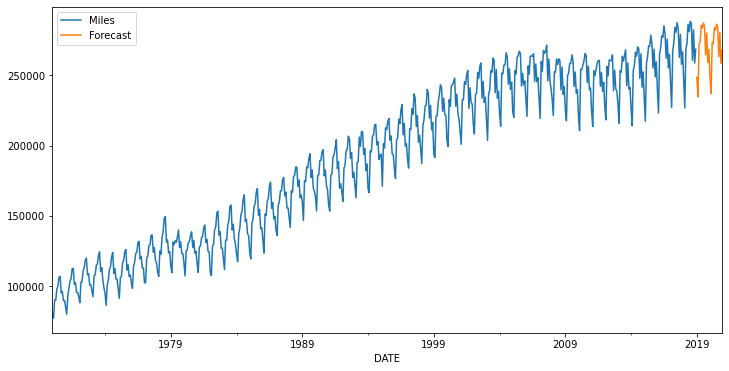

In [105]:
# Plotting Historic Data and Forecast:

df["Miles"].plot(figsize= (12,6), legend= True)
forecast_ser.plot(label= "Forecast", legend= True)